## Import Libraries

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from io import BytesIO
from PIL import Image

## Load Model

In [2]:
model = tf.keras.models.load_model('emotion_detection_model.h5')

In [16]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

## Model Testing

In [8]:
urls = [
        'https://farm3.static.flickr.com/2226/2140577195_61d14b7dc3.jpg', # Happy
        'https://media.istockphoto.com/photos/sad-baby-picture-id183758213?k=20&m=183758213&s=612x612&w=0&h=hixX-Ni6y_DxtdVAiF4szwmBkudtgvdD5C7eo7gaJKw=', # Sad
        'https://images.unsplash.com/photo-1611689037241-d8dfe4280f2e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8YW5ncnklMjBmYWNlfGVufDB8fDB8fA%3D%3D&w=1000&q=80', # Angry
        'https://thumbs.dreamstime.com/b/natural-portrait-young-attractive-man-his-s-looking-posing-neutral-face-expression-close-up-headshot-latin-serious-154438971.jpg', # Neutral
        ]

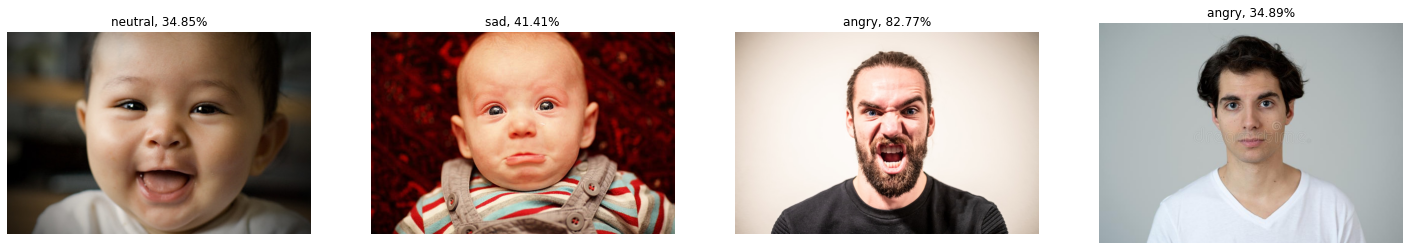

In [18]:
plt.figure(figsize=(25, 6))
for i in range(len(urls)):
    response = requests.get(urls[i])
    img = Image.open(BytesIO(response.content))
    img_pred = np.array(img)
    img_pred = tf.image.resize(img_pred, size=(48, 48)) / 255.0
    img_pred = tf.image.rgb_to_grayscale(img_pred)
    prediction = model.predict(np.expand_dims(img_pred, axis=0))
    
    plt.subplot(1, len(urls), i+1)
    plt.imshow(img)
    plt.title(f'{classes[np.argmax(prediction[0])]}, {prediction[0][np.argmax(prediction[0])]*100:.2f}%')
    plt.axis('off')
plt.show()